In [382]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

##### 1. Залить в свою БД данные по продажам (часть таблицы Orders в csv, исходник здесь 

In [383]:
df = pd.read_csv("databases/orders_all.csv", sep=";", nrows=1000)
#df_all = pd.read_csv("databases/orders_20190822.csv", sep=";")
#df_all = df_all.rename(columns={"id_o": "id_order", "user_id": "id_user"})

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
id_order    1000 non-null int64
id_user     1000 non-null int64
price       1000 non-null int64
o_date      1000 non-null object
dtypes: int64(3), object(1)
memory usage: 27.4+ KB


In [385]:
df.describe()

,id_order,id_user,price
count,1000.000000,1000.000000,1.000000e+03
mean,638.471000,5151.761000,7.000000e+12
std,290.165941,3417.980174,2.213594e+14
min,129.000000,1.000000,1.400000e+01
25%,388.750000,2565.000000,9.502500e+02
50%,639.500000,4864.500000,1.732500e+03
75%,889.250000,8615.500000,3.570000e+03
max,1139.000000,10614.000000,7.000000e+15


In [386]:
df['o_date'] = df['o_date'].astype('datetime64[ns]', error="ignore")

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
id_order    1000 non-null int64
id_user     1000 non-null int64
price       1000 non-null int64
o_date      1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.3 KB


In [388]:
df.head()

,id_order,id_user,price,o_date
0,129,1,1337,2013-04-26
1,130,155,182,2013-04-26
2,131,1,602,2013-04-26
3,132,1,863,2013-04-26
4,133,1,2261,2013-04-29


In [389]:
df.describe()

,id_order,id_user,price
count,1000.000000,1000.000000,1.000000e+03
mean,638.471000,5151.761000,7.000000e+12
std,290.165941,3417.980174,2.213594e+14
min,129.000000,1.000000,1.400000e+01
25%,388.750000,2565.000000,9.502500e+02
50%,639.500000,4864.500000,1.732500e+03
75%,889.250000,8615.500000,3.570000e+03
max,1139.000000,10614.000000,7.000000e+15


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
id_order    1000 non-null int64
id_user     1000 non-null int64
price       1000 non-null int64
o_date      1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.3 KB


##### 2. Проанализировать, какой период данных выгружен

In [391]:
min_date = df["o_date"].min()
min_date

Timestamp('2013-01-08 00:00:00')

In [392]:
max_date = df["o_date"].max()
max_date

Timestamp('2013-12-08 00:00:00')

In [393]:
print("Выгружены данные за период с {} по {}.".format(min_date, max_date))

Выгружены данные за период с 2013-01-08 00:00:00 по 2013-12-08 00:00:00.


##### 3. Посчитать кол-во строк, кол-во заказов и кол-во уникальных пользователей, кот совершали заказы.

In [394]:
total_rows = df.shape[0]
total_rows

1000

In [395]:
total_orders = df["id_order"].unique().size
total_orders

1000

In [396]:
total_users = df["id_user"].unique().size
total_users

863

In [397]:
print("Всего строк: {}\nУникальных заказов: {}\nУникальных пользователей: {}.".format(total_rows, total_orders, total_users))

Всего строк: 1000
Уникальных заказов: 1000
Уникальных пользователей: 863.


##### 4. По годам посчитать средний чек, среднее кол-во заказов на пользователя, сделать вывод , как изменялись это показатели Год от года.

In [398]:
def group_by_year(i):
    return df.iloc[i].o_date.year

In [399]:
# распределение средних цен по годам
price_avg_series = df.groupby(group_by_year)["price"].mean()
price_avg_series

2013    7.000000e+12
Name: price, dtype: float64

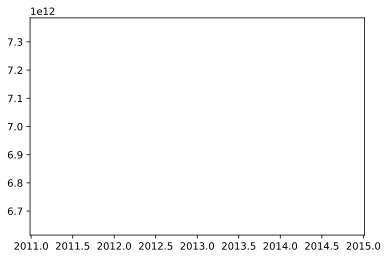

In [400]:
price_avg_series.plot()
plt.show()

In [401]:
# распределение среднего числа заказов одним пользователем по годам
df.groupby(group_by_year)["id_user", "id_order"].apply(lambda ser: ser["id_order"].size / ser["id_user"].unique().size)

2013    1.158749
dtype: float64

##### 5. Найти кол-во пользователей, кот покупали в одном году и перестали покупать в следующем.

In [402]:
# TODO: доделать

##### 6. Найти ID самого активного по кол-ву покупок пользователя.

In [403]:
most_active_user_id = df.groupby("id_user")["id_order"].count().idxmax()
most_active_user_id

302

In [404]:
order_counts = df.groupby("id_user")["id_order"].count()
most_active_user_id = order_counts.idxmax()
most_active_user_orders_count = order_counts.max()

In [405]:
print("Самый активный покупатель с id {} совершил {} покупок.".format(most_active_user_id, most_active_user_orders_count))

Самый активный покупатель с id 302 совершил 14 покупок.
